In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [70]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/-Practice/main/hotel_bookings.csv")
df.shape

(119390, 32)

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.width=None

In [8]:
df.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,10/21/2015
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

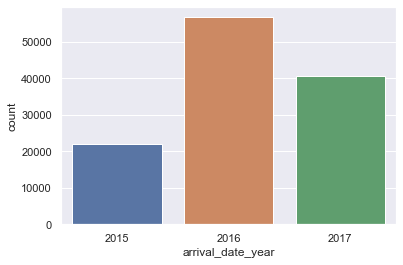

In [72]:
sns.countplot(x="arrival_date_year",data=df)

<AxesSubplot:xlabel='hotel', ylabel='count'>

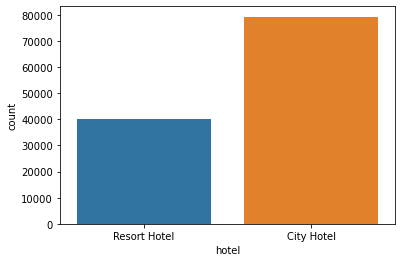

In [9]:
sns.countplot(x="hotel", data=df)

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

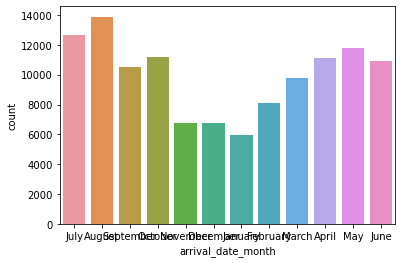

In [10]:
sns.countplot(x="arrival_date_month",data=df)

<AxesSubplot:xlabel='adults', ylabel='count'>

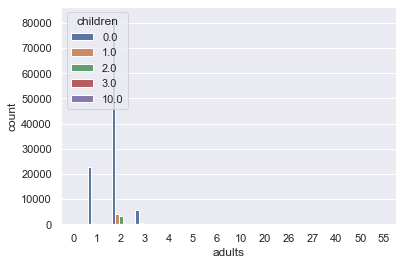

In [74]:
sns.countplot(x="adults",hue='children',data=df)

<AxesSubplot:xlabel='country', ylabel='count'>

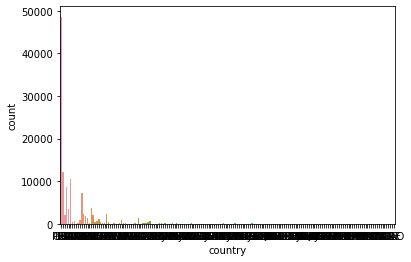

In [11]:
sns.countplot(x="country",data=df)

<AxesSubplot:xlabel='lead_time', ylabel='count'>

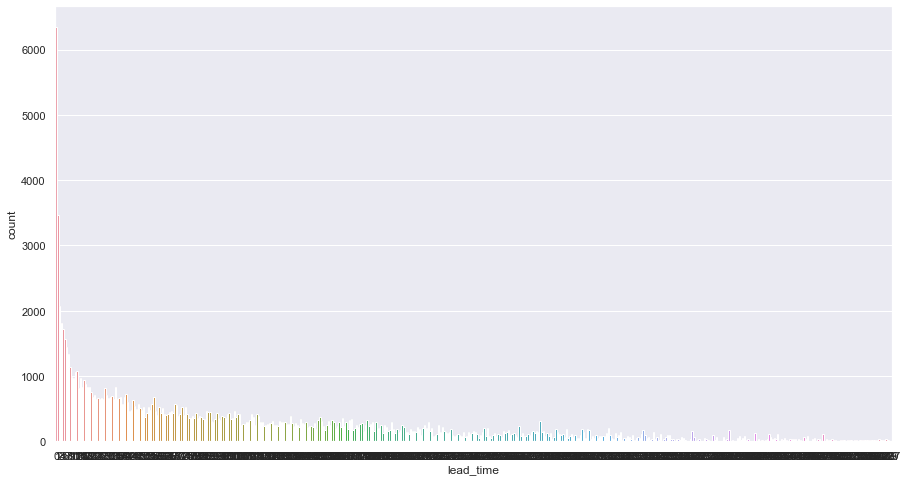

In [12]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="lead_time",data=df)

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

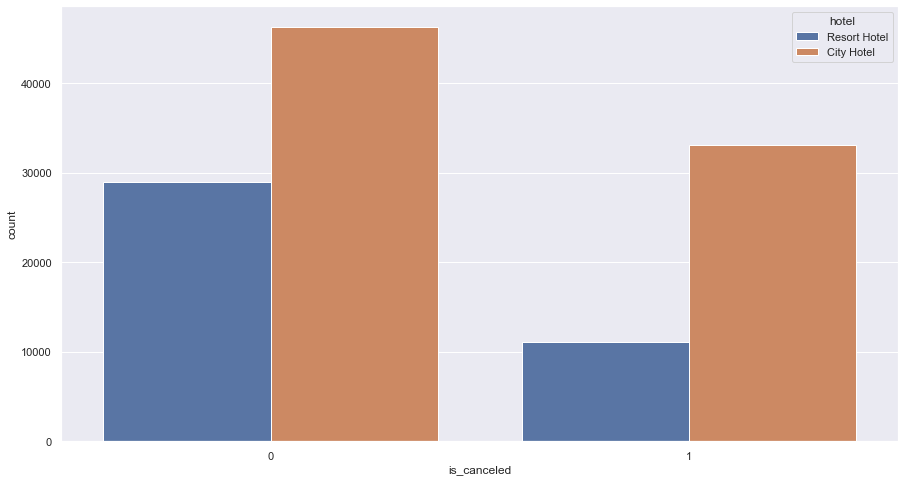

In [13]:
sns.countplot(x="is_canceled", hue="hotel",data=df)

<AxesSubplot:>

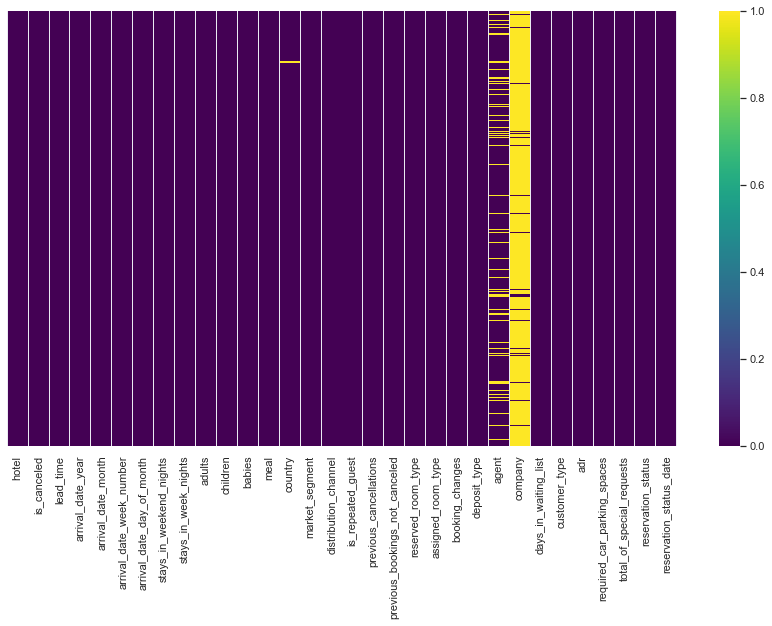

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [15]:
df.drop("company", axis=1,inplace=True)
df.drop("agent", axis=1,inplace=True)

In [16]:
df.drop("customer_type",axis=1,inplace=True)
df.drop("adr",axis=1,inplace=True)
df.drop("required_car_parking_spaces",axis=1,inplace=True)

In [17]:
df.drop("meal",axis=1,inplace=True)
df.drop("market_segment",axis=1,inplace=True)
df.drop("assigned_room_type",axis=1,inplace=True)


In [18]:
df.drop("reserved_room_type",axis=1,inplace=True)

<AxesSubplot:>

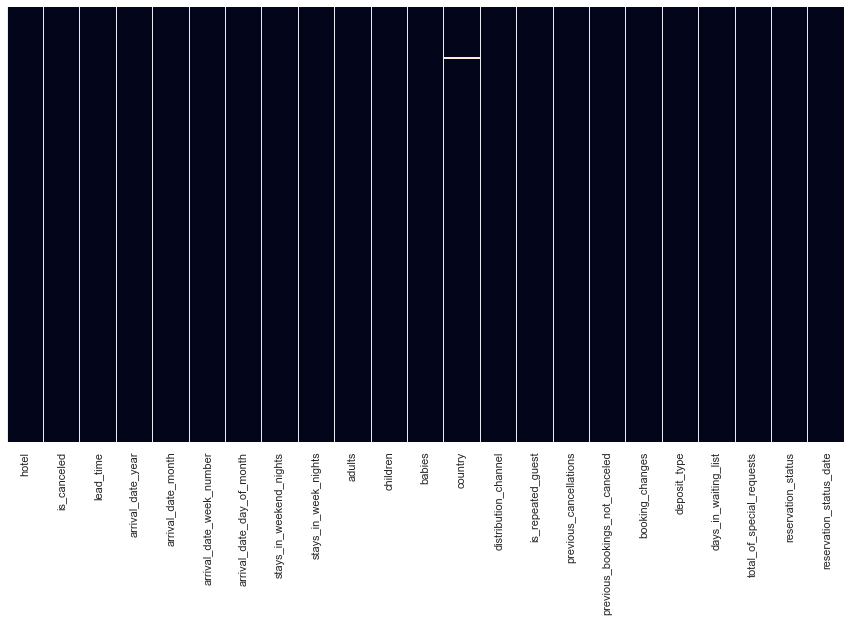

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [20]:
df.drop("deposit_type",axis=1,inplace=True)

In [21]:
df.drop("distribution_channel",axis=1,inplace=True)

In [22]:
df.drop("total_of_special_requests",axis=1,inplace=True)

In [23]:
hotel=pd.get_dummies(df["hotel"],drop_first=True)
hotel.head()

,Resort Hotel
0,1
1,1
2,1
3,1
4,1


In [24]:
df.drop("reservation_status",axis=1,inplace=True)

In [25]:
df.drop("reservation_status_date",axis=1,inplace=True)

In [26]:
df.drop("booking_changes",axis=1,inplace=True)

In [27]:
md1=df["children"].median()
df["children"].replace(np.nan,md1,inplace=True)

In [28]:
mode1=df["country"].mode().values[0]
df["country"]=df["country"].replace(np.nan,mode1)

In [29]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
days_in_waiting_list              0
dtype: int64

In [30]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
country                            object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
days_in_waiting_list                int64
dtype: object

In [31]:
df=pd.concat([df,hotel],axis=1)
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,Resort Hotel
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BEL,0,0,0,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,FRA,0,0,0,0,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,DEU,0,0,0,0,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,GBR,0,0,0,0,0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,DEU,0,0,0,0,0


In [32]:
df.drop("hotel",axis=1,inplace=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,0,PRT,0,0,0,0,1
1,0,737,2015,July,27,1,0,0,2,0.0,0,PRT,0,0,0,0,1
2,0,7,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,0,1
3,0,13,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,0,1
4,0,14,2015,July,27,1,0,2,2,0.0,0,GBR,0,0,0,0,1


In [33]:
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
country                            object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
days_in_waiting_list                int64
Resort Hotel                        uint8
dtype: object

In [34]:
month=pd.get_dummies(df["arrival_date_month"],drop_first=True)
month.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [35]:
country=pd.get_dummies(df["country"],drop_first=True)
country.head()

,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,ATA,ATF,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BOL,BRA,BRB,BWA,CAF,CHE,CHL,CHN,CIV,CMR,CN,COL,COM,CPV,CRI,CUB,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,ECU,EGY,ESP,EST,ETH,FIN,FJI,FRA,FRO,GAB,GBR,GEO,GGY,GHA,GIB,GLP,GNB,GRC,GTM,GUY,HKG,HND,HRV,HUN,IDN,IMN,IND,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JEY,JOR,JPN,KAZ,KEN,KHM,KIR,KNA,KOR,KWT,LAO,LBN,LBY,LCA,LIE,LKA,LTU,LUX,LVA,MAC,MAR,MCO,MDG,MDV,MEX,MKD,MLI,MLT,MMR,MNE,MOZ,MRT,MUS,MWI,MYS,MYT,NAM,NCL,NGA,NIC,NLD,NOR,NPL,NZL,OMN,PAK,PAN,PER,PHL,PLW,POL,PRI,PRT,PRY,PYF,QAT,ROU,RUS,RWA,SAU,SDN,SEN,SGP,SLE,SLV,SMR,SRB,STP,SUR,SVK,SVN,SWE,SYC,SYR,TGO,THA,TJK,TMP,TUN,TUR,TWN,TZA,UGA,UKR,UMI,URY,USA,UZB,VEN,VGB,VNM,ZAF,ZMB,ZWE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
df=pd.concat([df,country,month],axis=1)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,Resort Hotel,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,ATA,ATF,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BOL,BRA,BRB,BWA,CAF,CHE,CHL,CHN,CIV,CMR,CN,COL,COM,CPV,CRI,CUB,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,ECU,EGY,ESP,EST,ETH,FIN,FJI,FRA,FRO,GAB,GBR,GEO,GGY,GHA,GIB,GLP,GNB,GRC,GTM,GUY,HKG,HND,HRV,HUN,IDN,IMN,IND,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JEY,JOR,JPN,KAZ,KEN,KHM,KIR,KNA,KOR,KWT,LAO,LBN,LBY,LCA,LIE,LKA,LTU,LUX,LVA,MAC,MAR,MCO,MDG,MDV,MEX,MKD,MLI,MLT,MMR,MNE,MOZ,MRT,MUS,MWI,MYS,MYT,NAM,NCL,NGA,NIC,NLD,NOR,NPL,NZL,OMN,PAK,PAN,PER,PHL,PLW,POL,PRI,PRT,PRY,PYF,QAT,ROU,RUS,RWA,SAU,SDN,SEN,SGP,SLE,SLV,SMR,SRB,STP,SUR,SVK,SVN,SWE,SYC,SYR,TGO,THA,TJK,TMP,TUN,TUR,TWN,TZA,UGA,UKR,UMI,URY,USA,UZB,VEN,VGB,VNM,ZAF,ZMB,ZWE,August,December,February,January,July,June,March,May,November,October,September
0,0,342,2015,July,27,1,0,0,2,0.0,0,PRT,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,737,2015,July,27,1,0,0,2,0.0,0,PRT,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,7,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,13,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,14,2015,July,27,1,0,2,2,0.0,0,GBR,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [37]:
df.drop(["country","arrival_date_month"],axis=1,inplace=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,Resort Hotel,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,ATA,ATF,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BOL,BRA,BRB,BWA,CAF,CHE,CHL,CHN,CIV,CMR,CN,COL,COM,CPV,CRI,CUB,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,ECU,EGY,ESP,EST,ETH,FIN,FJI,FRA,FRO,GAB,GBR,GEO,GGY,GHA,GIB,GLP,GNB,GRC,GTM,GUY,HKG,HND,HRV,HUN,IDN,IMN,IND,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JEY,JOR,JPN,KAZ,KEN,KHM,KIR,KNA,KOR,KWT,LAO,LBN,LBY,LCA,LIE,LKA,LTU,LUX,LVA,MAC,MAR,MCO,MDG,MDV,MEX,MKD,MLI,MLT,MMR,MNE,MOZ,MRT,MUS,MWI,MYS,MYT,NAM,NCL,NGA,NIC,NLD,NOR,NPL,NZL,OMN,PAK,PAN,PER,PHL,PLW,POL,PRI,PRT,PRY,PYF,QAT,ROU,RUS,RWA,SAU,SDN,SEN,SGP,SLE,SLV,SMR,SRB,STP,SUR,SVK,SVN,SWE,SYC,SYR,TGO,THA,TJK,TMP,TUN,TUR,TWN,TZA,UGA,UKR,UMI,URY,USA,UZB,VEN,VGB,VNM,ZAF,ZMB,ZWE,August,December,February,January,July,June,March,May,November,October,September
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

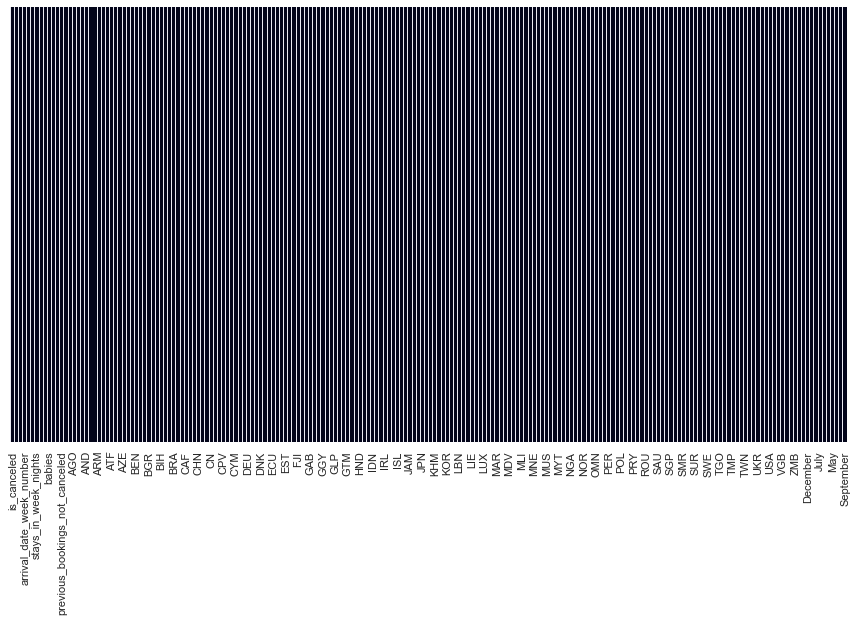

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [39]:
df.shape

(119390, 202)

In [40]:
x=df.drop("is_canceled",axis=1)
y=df["is_canceled"]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
predictions=model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.754837088533378

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82     22478
           1       0.73      0.55      0.62     13339

    accuracy                           0.75     35817
   macro avg       0.75      0.71      0.72     35817
weighted avg       0.75      0.75      0.75     35817



In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[19751,  2727],
       [ 6054,  7285]], dtype=int64)

<AxesSubplot:>

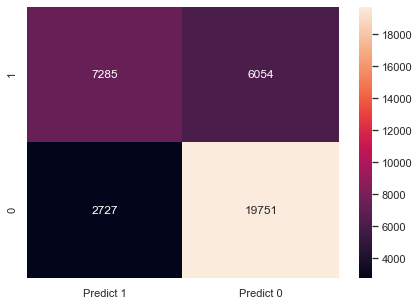

In [47]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [48]:
from sklearn import svm
from sklearn.svm import SVC

In [49]:
clf = svm.SVC(gamma=9, C=90)    

In [50]:
clf.fit(x_train , y_train)

SVC(C=90, gamma=9)

In [53]:
y_pred = clf.predict(x_test)

In [61]:
clf.score(x_train, y_train)

0.9878190324626375

In [63]:
clf.score(x_test, y_test)

0.8151436468715972

In [66]:
cancelled = pd.crosstab(index=df["is_canceled"],
                       columns="count")
print(cancelled)

col_0        count
is_canceled       
0            75166
1            44224


# Results

1. 44224 booking were canceled.
2. In city hotel no.of booking are 79330. In resort hotel booking no.of bookings are 40060.
3. The booking percentage in the year 2015 is 18%, in 2016 is 48% and in 2017 is 34%.
4. August is the busiest month for hotels.
5. The most of the guest are from PRT(Portugal).
6. The maximum lead time is 737hour.
7. The most booked accomodetion type is couple.
8. In the future the booking will not be canceled according to the prediction.